# p12: Accuracy of Chebyshev spectral differentiation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,abs,dot,exp
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis,grid
from chebPy import *

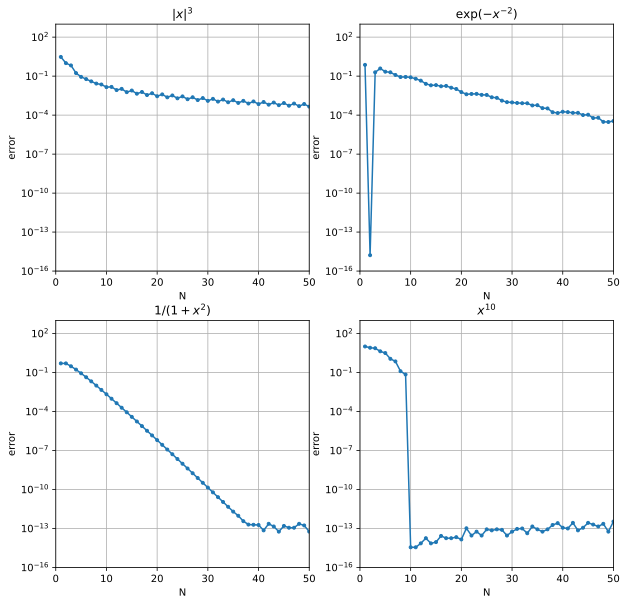

In [6]:
Nmax = 50
E = zeros((4,Nmax))
for N in range(1,Nmax+1):
    D,x = cheb(N)
    
    v = abs(x)**3          # 3rd deriv in BV
    vprime = 3.0*x*abs(x)
    E[0][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-(x+1.0e-15)**(-2))   # C-infinity
    vprime = 2.0*v/(x+1.0e-15)**3
    E[1][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+x**2)     # analytic in a [-1,1]
    vprime = -2.0*x*v**2
    E[2][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = x**10
    vprime = 10.0*x**9   # polynomial
    E[3][N-1] = norm(dot(D,v)-vprime,inf)


titles = ["$|x|^3$", "$\exp(-x^{-2})$", \
          "$1/(1+x^2)$", "$x^{10}$"]
figure(figsize=(10,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(1,Nmax+1,),E[iplot][:],'.-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])
    grid('on')